# Chapter 3: Probability Mass Functions

In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

In [2]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

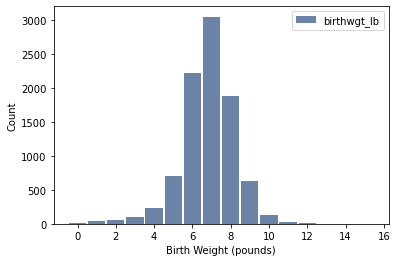

In [3]:
# Histogram of birth weights
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth Weight (pounds)', ylabel='Count')

To normalize the distribution, we divide through by the total count

In [7]:
n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n

The Probability Mass Function

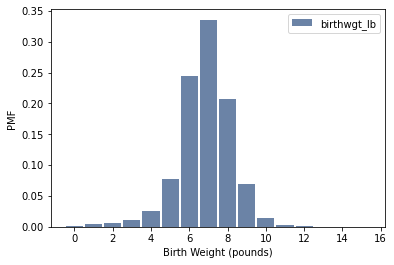

In [8]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Birth Weight (pounds)', ylabel='PMF')

In [10]:
# More directly, we can create a PMF object
pmf = thinkstats2.Pmf([1,2,2,3,5,5,5,6,7,9,9,1,3,4,4,4,5,5,3,3,7,8,9,9])
pmf

Pmf({1: 0.08333333333333333, 2: 0.08333333333333333, 3: 0.16666666666666666, 5: 0.20833333333333331, 6: 0.041666666666666664, 7: 0.08333333333333333, 9: 0.16666666666666666, 4: 0.125, 8: 0.041666666666666664})

'Prob' looks up a value and returns its probability

In [13]:
print(pmf.Prob(2))
print(pmf[2])

0.08333333333333333
0.08333333333333333


The 'Incr' method adds to the probability associated with a given value

In [14]:
pmf.Incr(2, 0.2)
pmf[2]

0.2833333333333333

'Mult' multiplies the probability associated with a value

In [15]:
pmf.Mult(2, 0.5)
pmf[2]

0.14166666666666666

'Total' returns the total probability

In [17]:
pmf.Total()

1.0583333333333333

'Normalize' divides through by the total probability, making it 1 again

In [18]:
pmf.Normalize()
pmf.Total()

1.0

PMF of pregancy length for live births

In [20]:
pmf = thinkstats2.Pmf(live.prglngth, label='prglngth')

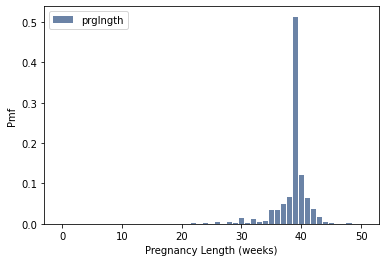

In [21]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Pregnancy Length (weeks)', ylabel='Pmf')

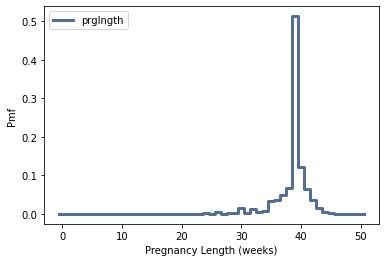

In [22]:
# Different look
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Pregnancy Length (weeks)', ylabel='Pmf')

Let's use 'MakeFrames' to return DataFrames for all live births, first babies, and others

In [24]:
live, firsts, others = first.MakeFrames()

# Distributions of pregnancy length
first_pmf = thinkstats2.Pmf(firsts.prglngth, label='firsts')
other_pmf = thinkstats2.Pmf(others.prglngth, label='others')

Regular PMF and the step function graph side by side

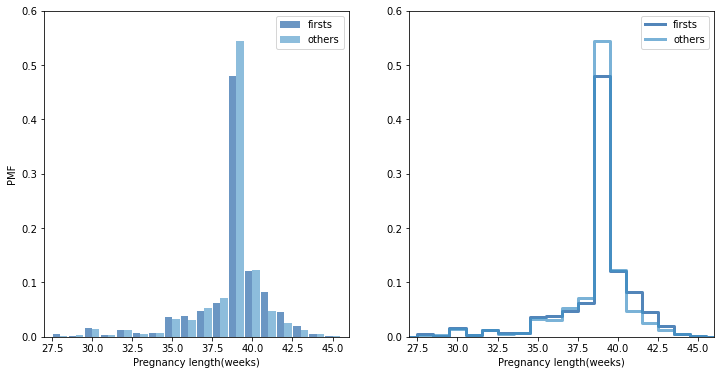

In [25]:
width=0.45
axis = [27, 46, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel='Pregnancy length(weeks)', axis=axis)

Here's the code that generates a plot of the difference in probability (in percentage points) between first babies and others, for each week of pregnancy (showing only pregnancies considered "full term").

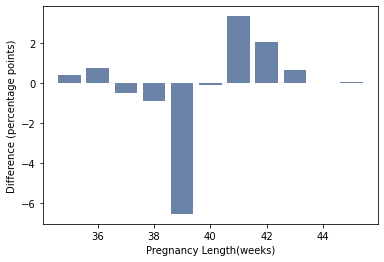

In [29]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1-p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs)
thinkplot.Config(xlabel='Pregnancy Length(weeks)', ylabel='Difference (percentage points)')

## Biasing and unbiasing PMFs

Suppose we have the following distribution of class sizes

In [30]:
d = { 7: 8, 12: 8, 17: 14, 22: 4, 
     27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

pmf = thinkstats2.Pmf(d, label='actual')

This function computes the biased PMF we would get if we surveyed students and asked about the size of the classes they are in.

In [33]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
    
    new_pmf.Normalize()
    return new_pmf

The following graph shows the difference between the actual and observed distributions.

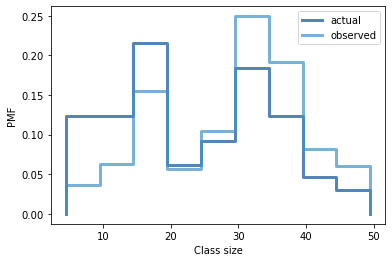

In [34]:
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

In [36]:
# The observed mean is substantially higher than the actual mean
print('Actual mean', pmf.Mean())
print('Observed mean', biased_pmf.Mean())

Actual mean 23.692307692307693
Observed mean 29.123376623376625


Unbiasing by applying the inverse operation

In [37]:
def UnbiasPmf(pmf, label=None):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf[x] *= 1/x
        
    new_pmf.Normalize()
    return new_pmf

In [38]:
unbiased = UnbiasPmf(biased_pmf, label='unbiased')
print('Unbiased mean', unbiased.Mean())

Unbiased mean 23.69230769230769


And plot the two distributions to confirm they are the same.

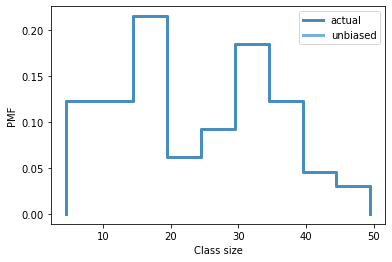

In [39]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, unbiased])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

## Pandas Indexing

In [41]:
import numpy as np
import pandas

## Exercise 1

In [42]:
resp = nsfg.ReadFemResp()

In [49]:
# Solution actual distribution
pmf = thinkstats2.Pmf(resp.numkdhh, label='number of children')

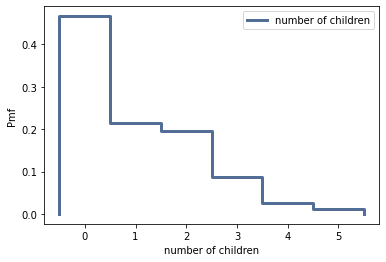

In [51]:
# Solution plot of actual distribution
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='number of children', ylabel='Pmf')

In [61]:
# Solution computing biased distribution
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
    
    new_pmf.Normalize()
    return new_pmf

biased_pmf = BiasPmf(pmf, label='biased')

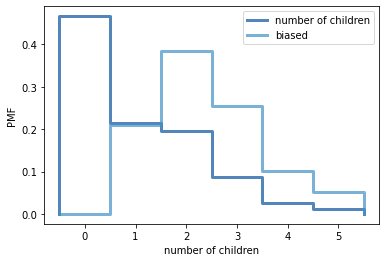

In [63]:
# Solution plotting  the actual vs the biased distributions
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='number of children', ylabel='PMF')

In [67]:
# Solution computing mean of actual distribution
pmf.Mean()

1.024205155043831

In [68]:
# Solution computing the mean of biased distribution
biased_pmf.Mean()

2.403679100664282